#Handwritten Digit Recognition using Convolutional Neural Networks with Pytorch

## Load srouce code files from git

In [1]:
import os, sys, importlib

user = "Paurnima-Chavan"
repo = "mnist-S6"
src_dir = "src"

if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

path = f"{repo}/{src_dir}" 
if not path in sys.path:
    sys.path.insert(1, path)

Cloning into 'mnist-S6'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), 4.47 KiB | 1.49 MiB/s, done.


In [2]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from utils import train, test,plot_dataset_images, plot_train_test_accuracy_loss
from model import Net, model_summary
from dataset import load_minst_data

## Load MNIST Dataset

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
#------------- added below code
device = torch.device("cuda" if cuda else "cpu")
device

CUDA Available? False


device(type='cpu')

In [4]:
train_loader , test_loader = load_minst_data(batch_size=128)

100%|██████████| 9912422/9912422 [00:00<00:00, 170147497.84it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 44161754.95it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 63418871.87it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18955750.02it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



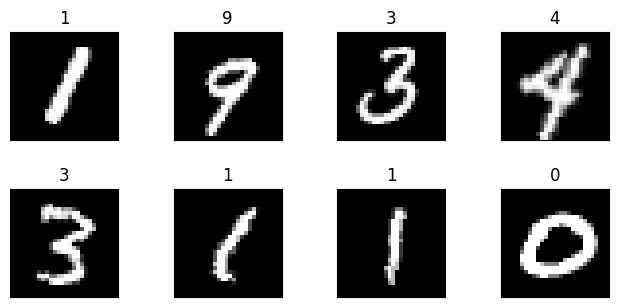

In [5]:
plot_dataset_images(train_loader, 8)

## Load the model

In [6]:
model = Net().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 26, 26]           1,280
              ReLU-2          [-1, 128, 26, 26]               0
       BatchNorm2d-3          [-1, 128, 26, 26]             256
            Conv2d-4            [-1, 4, 24, 24]           4,612
            Conv2d-5           [-1, 16, 22, 22]             592
              ReLU-6           [-1, 16, 22, 22]               0
       BatchNorm2d-7           [-1, 16, 22, 22]              32
         MaxPool2d-8           [-1, 16, 11, 11]               0
            Conv2d-9             [-1, 16, 9, 9]           2,320
             ReLU-10             [-1, 16, 9, 9]               0
      BatchNorm2d-11             [-1, 16, 9, 9]              32
        Dropout2d-12             [-1, 16, 9, 9]               0
           Conv2d-13             [-1, 16, 7, 7]           2,320
           Conv2d-14             [-1, 3

## Train the Model

In [7]:
from tqdm import tqdm

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20
criterion = F.nll_loss 

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2251 Batch_id=468 Accuracy=93.02: 100%|██████████| 469/469 [03:00<00:00,  2.60it/s]


Test set: Average loss: 0.0004, Accuracy: 9833/10000 (98.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0366 Batch_id=468 Accuracy=97.30: 100%|██████████| 469/469 [02:35<00:00,  3.02it/s]


Test set: Average loss: 0.0003, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0698 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [02:34<00:00,  3.03it/s]


Test set: Average loss: 0.0003, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0677 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [02:34<00:00,  3.04it/s]


Test set: Average loss: 0.0002, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0939 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [02:35<00:00,  3.01it/s]


Test set: Average loss: 0.0002, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1547 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [02:33<00:00,  3.06it/s]


Test set: Average loss: 0.0002, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0474 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [02:34<00:00,  3.04it/s]


Test set: Average loss: 0.0002, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0443 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [02:33<00:00,  3.05it/s]


Test set: Average loss: 0.0002, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0100 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [02:34<00:00,  3.03it/s]


Test set: Average loss: 0.0002, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0069 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [02:35<00:00,  3.01it/s]


Test set: Average loss: 0.0002, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0930 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [02:36<00:00,  3.01it/s]


Test set: Average loss: 0.0002, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0431 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [02:36<00:00,  3.00it/s]


Test set: Average loss: 0.0002, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0729 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [02:36<00:00,  3.00it/s]


Test set: Average loss: 0.0002, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0154 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [02:36<00:00,  3.00it/s]


Test set: Average loss: 0.0002, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0880 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [02:36<00:00,  3.01it/s]


Test set: Average loss: 0.0001, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0221 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [02:36<00:00,  3.00it/s]


Test set: Average loss: 0.0001, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0491 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [02:37<00:00,  2.98it/s]


Test set: Average loss: 0.0001, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0069 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [02:35<00:00,  3.02it/s]


Test set: Average loss: 0.0001, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0822 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [02:34<00:00,  3.04it/s]


Test set: Average loss: 0.0001, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0162 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [02:35<00:00,  3.02it/s]


Test set: Average loss: 0.0001, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.


## Plot model performance

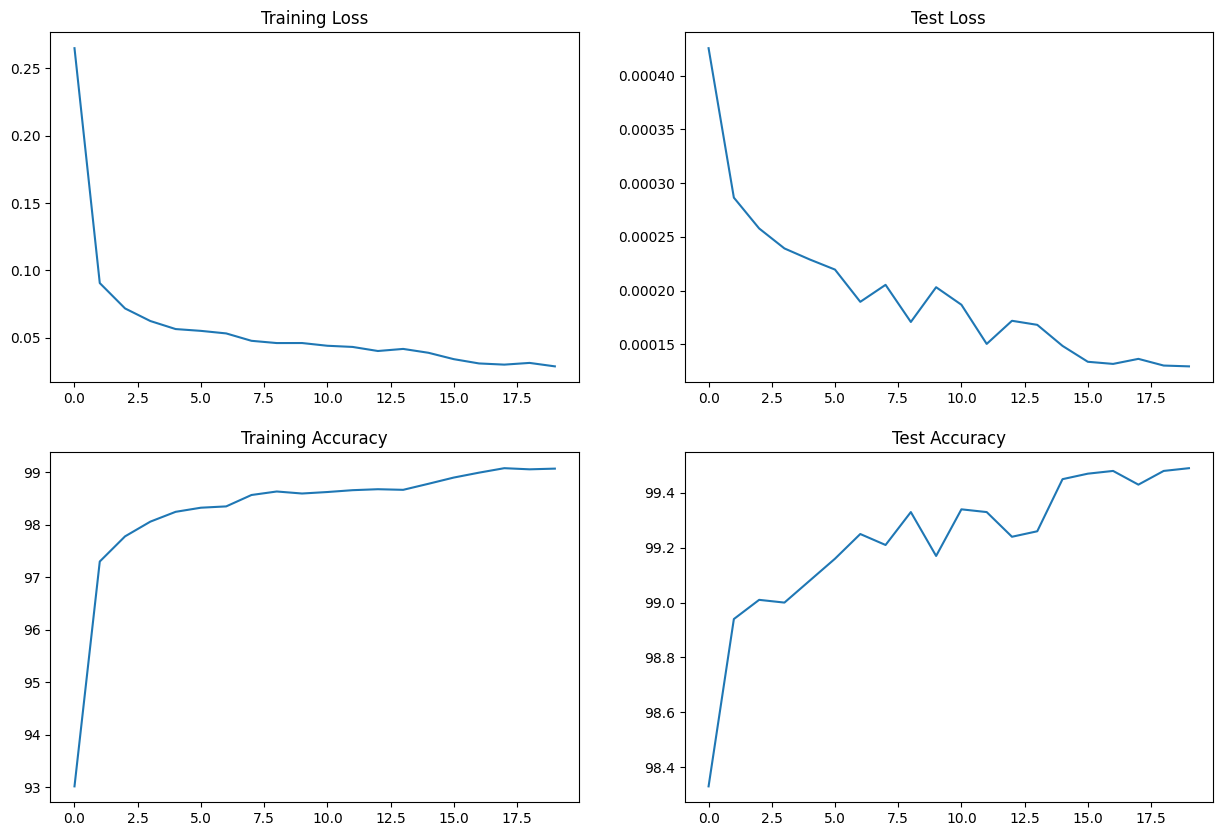

In [8]:
plot_train_test_accuracy_loss()